<a href="https://colab.research.google.com/github/UEC-MaTa/News_Aggregator/blob/main/notebooke2c7d39000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras.preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input")) 要確認、そのままだとエラーになる

# Any results you write to the current directory are saved as output.

In [4]:
import os
import pandas as pd

#newsCorpora.csv
newsCorpora = pd.read_csv('/content/drive/MyDrive/Tensorflow/NewsAggregator/newsCorpora.csv',sep='\t',  names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
display(newsCorpora.shape)
display(newsCorpora)

(422419, 8)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
...,...,...,...,...,...,...,...,...
422414,422933,Surgeons to remove 4-year-old's rib to rebuild...,http://www.cbs3springfield.com/story/26378648/...,WSHM-TV,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.cbs3springfield.com,1409229190251
422415,422934,Boy to have surgery on esophagus after battery...,http://www.wlwt.com/news/boy-to-have-surgery-o...,WLWT Cincinnati,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wlwt.com,1409229190508
422416,422935,Child who swallowed battery to have reconstruc...,http://www.newsnet5.com/news/local-news/child-...,NewsNet5.com,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.newsnet5.com,1409229190771
422417,422936,Phoenix boy undergoes surgery to repair throat...,http://www.wfsb.com/story/26368078/phoenix-boy...,WFSB,m,dpcLMoJD69UYMXMxaoEFnWql9YjQM,www.wfsb.com,1409229191071


In [5]:
# Original was # data = pd.read_csv('../input/uci-news-aggregator.csv', usecols=['TITLE', 'CATEGORY'])
data = newsCorpora[['TITLE', 'CATEGORY']]

In [6]:
data

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


**Created by Peter Nagy | 2018 May**<br/>
 [Github](https://github.com/nagypeterjob)  <br/>
 [Linkedin](https://www.linkedin.com/in/peternagyjob/)<br/>
In this kernel I do perform a multi-class classification with LSTM (Keras).

In [7]:
#M class has way less data than the orthers, thus the classes are unbalanced.
data.CATEGORY.value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [8]:
#I do aspire here to have balanced classes
num_of_categories = 45000
shuffled = data.reindex(np.random.permutation(data.index))
#https://docs.google.com/document/d/1yCGwcOrNaS-piPpez0hG_EKY4sqsNyRL4p7WQ_QQzy0/edit
e = shuffled[shuffled['CATEGORY'] == 'e'][:num_of_categories]
b = shuffled[shuffled['CATEGORY'] == 'b'][:num_of_categories]
t = shuffled[shuffled['CATEGORY'] == 't'][:num_of_categories]
m = shuffled[shuffled['CATEGORY'] == 'm'][:num_of_categories]
concated = pd.concat([e,b,t,m], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [9]:
shuffled #確認

,TITLE,CATEGORY
103334,Emma Stone wears raunchy black leather dress t...,e
216136,Researchers Warn of Dengue Outbreak During FIF...,m
145186,Country Star Kevin Sharp Dead at 43,e
398432,McDonald's faces liability for franchise resta...,b
277701,ISS crew safe after reports of smoke,t
...,...,...
153274,iPhone 6: Go Big Or Go Home,t
301207,US Patent Office Rules To Cancel Redskins Trad...,b
367507,"Intel, Samsung, Atmel, Broadcom, Dell, and oth...",t
118006,"Ice Cube Says He Was ""Robbed"" After Losing To ...",e


In [10]:
concated #確認

,TITLE,CATEGORY,LABEL
54027,AstraZeneca forecasts sales of $45 billion by ...,b,0
120409,New mystery for NASA: Why is Jupiter's red spo...,t,0
70122,Why Hewlett-Packard (HPQ) Stock Is Falling Thu...,b,0
19358,'Game of Thrones' Renewed for Two More Seasons,e,0
79806,Libya to resume eastern port exports,b,0
...,...,...,...
149362,"Parents Love Their Phones, Tablets Even During...",m,0
9612,"David Brenner Dies; Comedian, Tonight Show Sta...",e,0
90908,$1 million for GM victims' families,t,0
80974,Chipotle Mexican Grill PT Raised to $592.00 (CMG),b,0


In [11]:
concated.keys() #確認

Index(['TITLE', 'CATEGORY', 'LABEL'], dtype='object')

In [12]:
#One-hot encode the lab
concated.loc[concated['CATEGORY'] == 'e', 'LABEL'] = 0
concated.loc[concated['CATEGORY'] == 'b', 'LABEL'] = 1
concated.loc[concated['CATEGORY'] == 't', 'LABEL'] = 2
concated.loc[concated['CATEGORY'] == 'm', 'LABEL'] = 3
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=4)
print(labels[:10])
print('★', concated) #★
if 'CATEGORY' in concated.keys():
    concated.drop(['CATEGORY'], axis=1) #★このif文の意味合いは分からず

print('★★', concated) #★
'''
 [1. 0. 0. 0.] e
 [0. 1. 0. 0.] b
 [0. 0. 1. 0.] t
 [0. 0. 0. 1.] m
'''

54027     1
120409    2
70122     1
19358     0
79806     1
34414     0
109926    2
120980    2
73485     1
170950    3
Name: LABEL, dtype: int64
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
★                                                     TITLE CATEGORY  LABEL
54027   AstraZeneca forecasts sales of $45 billion by ...        b      1
120409  New mystery for NASA: Why is Jupiter's red spo...        t      2
70122   Why Hewlett-Packard (HPQ) Stock Is Falling Thu...        b      1
19358      'Game of Thrones' Renewed for Two More Seasons        e      0
79806                Libya to resume eastern port exports        b      1
...                                                   ...      ...    ...
149362  Parents Love Their Phones, Tablets Even During...        m      3
9612    David Brenner Dies; Comedian, Tonight Show Sta...        e      0
90908                 $1 million fo

'\n [1. 0. 0. 0.] e\n [0. 1. 0. 0.] b\n [0. 0. 1. 0.] t\n [0. 0. 0. 1.] m\n'

In [13]:
concated #確認

,TITLE,CATEGORY,LABEL
54027,AstraZeneca forecasts sales of $45 billion by ...,b,1
120409,New mystery for NASA: Why is Jupiter's red spo...,t,2
70122,Why Hewlett-Packard (HPQ) Stock Is Falling Thu...,b,1
19358,'Game of Thrones' Renewed for Two More Seasons,e,0
79806,Libya to resume eastern port exports,b,1
...,...,...,...
149362,"Parents Love Their Phones, Tablets Even During...",m,3
9612,"David Brenner Dies; Comedian, Tonight Show Sta...",e,0
90908,$1 million for GM victims' families,t,2
80974,Chipotle Mexican Grill PT Raised to $592.00 (CMG),b,1


In [14]:
concated.keys() #確認

Index(['TITLE', 'CATEGORY', 'LABEL'], dtype='object')

In [15]:
labels #確認

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [16]:
labels.shape #確認

(180000, 4)

In [17]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['TITLE'].values)
sequences = tokenizer.texts_to_sequences(concated['TITLE'].values)
word_index = tokenizer.word_index
# 学習した単語とそのindex
print(tokenizer.word_index) #★
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

print(X) #★
print(X.shape) #★

{'to': 1, 'in': 2, 'the': 3, 'of': 4, 'for': 5, 'on': 6, 'and': 7, 'a': 8, 'with': 9, 'new': 10, 'at': 11, 'is': 12, 'us': 13, 'as': 14, 'from': 15, 'after': 16, 'by': 17, 'be': 18, 'google': 19, 'up': 20, 'more': 21, 'says': 22, 'may': 23, 'study': 24, 'apple': 25, 'over': 26, 'ebola': 27, 'first': 28, 'will': 29, '1': 30, '2': 31, '2014': 32, 'video': 33, 'health': 34, 'samsung': 35, 'not': 36, 'you': 37, '3': 38, 'are': 39, 'report': 40, 'cancer': 41, 'about': 42, 'one': 43, '4': 44, 'microsoft': 45, 'could': 46, 'it': 47, 'out': 48, 'your': 49, 'galaxy': 50, '5': 51, 'facebook': 52, 'day': 53, 'this': 54, 'who': 55, 'million': 56, 'can': 57, 'watch': 58, 'year': 59, 's': 60, 'than': 61, 'west': 62, 'but': 63, 'has': 64, 'that': 65, 'have': 66, 'update': 67, 'virus': 68, 'its': 69, 'sales': 70, 'mers': 71, 'risk': 72, 'deal': 73, 'how': 74, 'china': 75, 'stocks': 76, 'off': 77, 'now': 78, 'time': 79, 'e': 80, 'review': 81, 'what': 82, 'data': 83, 'news': 84, 'no': 85, '6': 86, 'amaz

In [18]:
#★https://analytics-note.xyz/machine-learning/keras-tokenizer-tutorial/
# デフォルトでは、文字を小文字に揃える。
print(tokenizer.lower)
# True

# デフォルトでは文字単位ではなく、次のsplitで区切った単語単位でトークン化する。
print(tokenizer.char_level)
# False

# デフォルトでは、split に半角スペースが指定されており、スーペースで区切られる。
print(tokenizer.split == " ")

# いくつかの記号は除外され、単語中に含まれている場合はそこで区切られる。
print(tokenizer.filters)
# !"#$%&()*+,-./:;<=>?@[\]^_`{|}~

# 例えば、 dog&cat は &が取り除かれ、 dog と cat が個別にトークン化される。
print(tokenizer.texts_to_sequences(["dog&cat"]))
# [[7316, 2043]]

#★
print("\nトークン")
print(tokenizer.texts_to_sequences(["spouse give a candy bar"]))

# 数列をテキストに戻す。
text_data_2 = tokenizer.sequences_to_texts(sequences)

print("\nテキスト")
print(text_data_2[0])

# 与えられた文章の数を取得します。
print("\n")
print("与えられた文章の数 : ", tokenizer.document_count)

True
False
True
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~
[[1381, 3291]]

トークン
[[3849, 752, 8, 1078, 2708]]

テキスト
astrazeneca forecasts sales of 45 billion by in bid to fight off pfizer


与えられた文章の数 :  180000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(135000, 130) (135000, 4)
(45000, 130) (45000, 4)


In [20]:
epochs = 10
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [21]:
print(X_train) #★
print(y_train) #★
print(X_train[0]) #★
print(y_train[0]) #★

[[   0    0    0 ...  435    2  307]
 [   0    0    0 ...    6    3  500]
 [   0    0    0 ...    9  933  732]
 ...
 [   0    0    0 ...   19  214 2737]
 [   0    0    0 ...   74   37 1803]
 [   0    0    0 ...   17  525 1187]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0   28 1726  174    9
   62  435    2  307]
[0. 0. 0. 1.]


In [22]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

((135000, 130), (135000, 4), (45000, 130), (45000, 4))
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 130, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 1,073,668
Trainable params: 1,073,668
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
422/422 [==============================] 

In [23]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1407/1407 [==============================] - 28s 20ms/step - loss: 0.2187 - acc: 0.9249
Test set
  Loss: 0.219
  Accuracy: 0.925


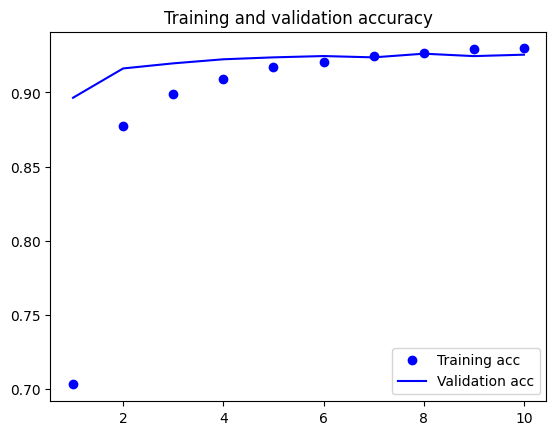

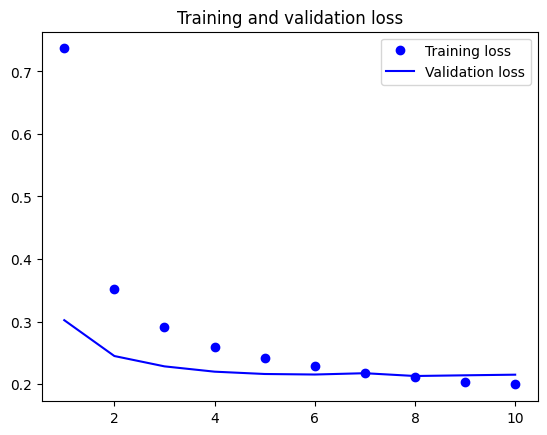

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
txt = ["Regular fast food eating linked to fertility issues in women"]
seq = tokenizer.texts_to_sequences(txt)
print(seq) #★
padded = pad_sequences(seq, maxlen=max_len)
print(padded) #★
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

[[3946, 763, 249, 694, 241, 1, 4706, 412, 2, 236]]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 3946  763  249  694  241    1
  4706  412    2  236]]
1/1 [==============================] - 0s 77ms/step
[[5.5892058e-05 3.8917156e-04 5.3360200e-05 9.9950159e-01]] health


確認：   
1 Fed official says weak data caused by weather, should not slow taper http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss Los Angeles Times **b**

99457 Rio 2' is king of the jungle http://bostonherald.com/entertainment/movies/movie_reviews/2014/04/rio_2_is_king_of_the_jungle Boston Herald **e**

309370 BMW, Ford, Chrysler join Japanese automakers in airbag recall http://kitchener.ctvnews.ca/bmw-ford-chrysler-join-japanese-automakers-in-airbag-recall-1.1882231 CTV News **t**

422937 Phoenix boy undergoes surgery to repair throat damage - CBS 3 Springfield ... http://www.cbs3springfield.com/story/26368078/phoenix-boy-undergoes-surgery-to-repair-throat-damage-from-button-battery WSHM-TV **m**


In [ ]:
txt = ["Fed official says weak data caused by weather, should not slow taper"] #確認
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 133ms/step
[[7.5025175e-04 9.9534166e-01 2.5763419e-03 1.3317269e-03]] bussiness


In [ ]:
txt = ["Rio 2' is king of the jungle"] #確認
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 47ms/step
[[9.9847132e-01 7.6254108e-04 5.5303791e-04 2.1319538e-04]] entertainment


In [ ]:
txt = ["BMW, Ford, Chrysler join Japanese automakers in airbag recall"] #確認
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 184ms/step
[[1.3762778e-04 3.8258236e-02 9.6144396e-01 1.6023674e-04]] science/tech


In [ ]:
txt = ["Phoenix boy undergoes surgery to repair throat damage"] #確認
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['entertainment', 'bussiness', 'science/tech', 'health']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 43ms/step
[[2.7482520e-04 9.1161095e-03 3.8212218e-04 9.9022698e-01]] health
